# Analysis of referendum vote 

We are interested in deriving insights from the outcomes of a hypothetical referendum vote, concerning the territories under French administration.

## Understanding the data

We first try to develop an understanding of the basic structure of the dataset `Referendum.csv`. 

### Importing essential libraries 

In [13]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

#### Reading the dataset into a pandas dataframe

In [2]:
data = pd.read_csv("Referendum.csv", sep=";")

### Different fields of information 

In [3]:
data.columns

Index(['Code du département', 'Libellé du département', 'Code de la commune',
       'Libellé de la commune', 'Inscrits', 'Abstentions', 'Blancs et nuls',
       'Choix A', 'Choix B'],
      dtype='object')

Inferring from the column labels, we can create a data dictionary as follows : 
* **Code du département** : Identification code of the French administrative entity *département* . 
* **Libellé du département** : Name of the *département*
* **Code de la commune** : Identification code of the French administrative entity *commune* . 
* **Libellé de la commune** : Name of the *commune*
* **Inscrits** : Number of registered voters in the commune
* **Abstentions** : Number of registered voters who were absent during voting
* **Blancs et nuls** : Number of registered voters who cast a blank vote
* **Choix A** : Number of registered voters who voted for the first option
* **Choix B** : Number of registered voters who voted for the second option

### First few rows of the dataset 

In [4]:
data.head(10)

,Code du département,Libellé du département,Code de la commune,Libellé de la commune,Inscrits,Abstentions,Blancs et nuls,Choix A,Choix B
0,1,AIN,1,L'Abergement-Clémenciat,592,84,9,154,345
1,1,AIN,2,L'Abergement-de-Varey,215,36,5,66,108
2,1,AIN,4,Ambérieu-en-Bugey,8205,1698,126,2717,3664
3,1,AIN,5,Ambérieux-en-Dombes,1152,170,18,280,684
4,1,AIN,6,Ambléon,105,17,1,35,52
5,1,AIN,7,Ambronay,1702,222,29,570,881
6,1,AIN,8,Ambutrix,549,68,7,192,282
7,1,AIN,9,Andert-et-Condon,269,40,4,81,144
8,1,AIN,10,Anglefort,681,99,12,222,348
9,1,AIN,11,Apremont,255,30,7,77,141


### Last few rows of the dataset

In [5]:
data.tail(10)

,Code du département,Libellé du département,Code de la commune,Libellé de la commune,Inscrits,Abstentions,Blancs et nuls,Choix A,Choix B
36781,ZZ,FRANCAIS DE L'ETRANGER,2,Amérique latine,73912,52648,363,9456,11445
36782,ZZ,FRANCAIS DE L'ETRANGER,3,Europe du Nord,88133,59723,269,13414,14727
36783,ZZ,FRANCAIS DE L'ETRANGER,4,Benelux,95182,46980,432,20274,27496
36784,ZZ,FRANCAIS DE L'ETRANGER,5,Péninsule ibérique et Monaco,80761,53215,305,11856,15385
36785,ZZ,FRANCAIS DE L'ETRANGER,6,Suisse,79508,29458,514,16971,32565
36786,ZZ,FRANCAIS DE L'ETRANGER,7,Europe centrale,89643,54981,318,17055,17289
36787,ZZ,FRANCAIS DE L'ETRANGER,8,"Europe du Sud, Turquie, Israël",109763,84466,292,9299,15706
36788,ZZ,FRANCAIS DE L'ETRANGER,9,Afrique Nord-Ouest,98997,59887,321,22116,16673
36789,ZZ,FRANCAIS DE L'ETRANGER,10,"Afrique Centre, Sud et Est",89859,46782,566,17008,25503
36790,ZZ,FRANCAIS DE L'ETRANGER,11,"Europe de l'est, Asie, Océanie",80061,42911,488,13975,22687


> We observe that the field "Code du département" contains numerical as well as string (alphabetical) values. 

### General description of the dataset

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36791 entries, 0 to 36790
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Code du département     36791 non-null  object
 1   Libellé du département  36791 non-null  object
 2   Code de la commune      36791 non-null  int64 
 3   Libellé de la commune   36791 non-null  object
 4   Inscrits                36791 non-null  int64 
 5   Abstentions             36791 non-null  int64 
 6   Blancs et nuls          36791 non-null  int64 
 7   Choix A                 36791 non-null  int64 
 8   Choix B                 36791 non-null  int64 
dtypes: int64(6), object(3)
memory usage: 2.5+ MB


Our dataset contains 36791 instances (rows) and 9 attributes, with no immediately visible null values.  

> The only string type objects in the dataset are under the fields "Code du département" , "Libellé du département" and "Libellé de la commune", where the first field is stored as string objects as it contains alphanumeric values. 

### Renaming columns
We start by modifying the column names so that they're easier to manipulate. 

In [7]:
mapping = { "Code du département": "dep_code" ,
            "Libellé du département" : "dep_label" ,
            "Code de la commune" : "com_code" , 
            "Libellé de la commune" : "com_label" , 
            "Inscrits" : "registered" , 
            "Abstentions" : "absent" ,
            "Blancs et nuls" : "no_vote" , 
            "Choix A" : "choice_a" , 
            "Choix B" : "choice_b"}

data = data.rename(mapping , axis=1)
data.columns

Index(['dep_code', 'dep_label', 'com_code', 'com_label', 'registered',
       'absent', 'no_vote', 'choice_a', 'choice_b'],
      dtype='object')

### Sanity Checks

#### Missing Values

In [8]:
null_values = data.isnull().sum()
null_values

dep_code      0
dep_label     0
com_code      0
com_label     0
registered    0
absent        0
no_vote       0
choice_a      0
choice_b      0
dtype: int64

> We have a well cleaned dataset, with no null/missing values. 

#### Vote Count Consistency 
We also verify whether the columns containing the number of votes are consistent i.e. the sum of the number of voters for `choice_a`, `choice_b`, `absent` and `no_vote` must be equal to the total number of registed voters (`registered`).

In [9]:
mask = (data["registered"] == data["choice_a"] + data["choice_b"] + 
        data["absent"] + data["no_vote"] )
data.loc[~mask].count()

dep_code      0
dep_label     0
com_code      0
com_label     0
registered    0
absent        0
no_vote       0
choice_a      0
choice_b      0
dtype: int64

> Thus, there are no inconsistencies when it comes to the vote counts. 

### Frequency tables 
We turn our attention towards the categorical variables in our dataset. 


#### Departments
We start by looking at the identification codes and names. 

In [82]:
data["dep_code"].value_counts()

62    895
2     816
80    782
76    744
57    730
     ... 
ZZ     11
ZS      2
ZX      2
ZW      1
75      1
Name: dep_code, Length: 107, dtype: int64

In [83]:
data["dep_label"].value_counts()

PAS DE CALAIS                    895
AISNE                            816
SOMME                            782
SEINE MARITIME                   744
MOSELLE                          730
                                ... 
FRANCAIS DE L'ETRANGER            11
SAINT PIERRE ET MIQUELON           2
SAINT-MARTIN/SAINT-BARTHELEMY      2
PARIS                              1
WALLIS-ET-FUTUNA                   1
Name: dep_label, Length: 107, dtype: int64

> Thus, we have 107 unique departments in our dataset, where several of them consist of hundreds of communes (e.g. *PAS DE CALAIS*, with its rows displayed below). 

In [86]:
data.loc[data["dep_label"] == "PAS DE CALAIS"][:5]

,dep_code,dep_label,com_code,com_label,registered,absent,no_vote,choice_a,choice_b
24894,62,PAS DE CALAIS,1,Ablain-Saint-Nazaire,1468,220,26,506,716
24895,62,PAS DE CALAIS,2,Ablainzevelle,156,12,4,56,84
24896,62,PAS DE CALAIS,3,Acheville,499,67,6,157,269
24897,62,PAS DE CALAIS,4,Achicourt,5927,995,88,2444,2400
24898,62,PAS DE CALAIS,5,Achiet-le-Grand,673,101,9,274,289


#### Communes
We repeat the above exercise for the identification codes and names of the communes. 

In [24]:
data["com_code"].value_counts()

59     91
77     91
13     91
58     91
4      91
       ..
880     1
848     1
837     1
869     1
895     1
Name: com_code, Length: 908, dtype: int64

> We see that the commune codes are not unique, and several communes from different departments have identical identification codes. 

In [37]:
data["com_label"].value_counts()

Sainte-Colombe               14
Saint-Sauveur                12
Saint-Sulpice                11
Beaulieu                     11
Sainte-Marie                 11
                             ..
Raedersdorf                   1
Démouville                    1
Notre-Dame-de-la-Rouvière     1
Léojac                        1
Saint-Santin-Cantalès         1
Name: com_label, Length: 34237, dtype: int64

> Surprisingly (or not), even commune names are not unique to the commune. For example, several departments have a commune named *Sainte-Colombe*, as displayed below.

In [85]:
data.loc[data["com_label"] == "Sainte-Colombe"][:5]

,dep_code,dep_label,com_code,com_label,registered,absent,no_vote,choice_a,choice_b
1883,5,HAUTES ALPES,135,Sainte-Colombe,60,11,2,37,10
5784,16,CHARENTE,309,Sainte-Colombe,139,21,7,55,56
6203,17,CHARENTE MARITIME,319,Sainte-Colombe,101,23,0,53,25
7837,21,COTE D'OR,544,Sainte-Colombe,49,5,3,16,25
9676,25,DOUBS,515,Sainte-Colombe,252,27,1,88,136


### Descriptive Statistics 

We take a quick look at the descriptive statistics for the numerical columns. 

In [10]:
data.describe()

,com_code,registered,absent,no_vote,choice_a,choice_b
count,36791.000000,3.679100e+04,36791.000000,36791.000000,36791.000000,36791.000000
mean,251.665217,1.251082e+03,256.697100,19.058737,426.723383,548.602348
std,181.696562,8.595773e+03,2075.420552,96.750220,3303.009008,3346.575020
min,1.000000,6.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,105.000000,1.600000e+02,23.000000,2.000000,49.000000,81.000000
50%,218.000000,3.370000e+02,49.000000,6.000000,108.000000,169.000000
75%,361.000000,8.070000e+02,120.000000,14.000000,268.000000,402.000000
max,909.000000,1.253322e+06,248755.000000,12093.000000,506594.000000,485880.000000


> There are a couple of quick observations : 
>1. All numerical attributes (except `com_code`, identification codes are not statistically relevant) displays a lot of variability. The standard deviation is each case is several times the mean, which hints that the underlying distributions are not *normal* (Gaussian), but instead have long tails. 
>2. There are communes where none of the people voted (0 votes for `choice_a` or `choice_b`) for one of the options on the table. It might be interesting to identify these communes, and figure out why this is the case. 

#### Distributions 
To illustrate the first point about the outliers near the tail, we plot the following distributions. 

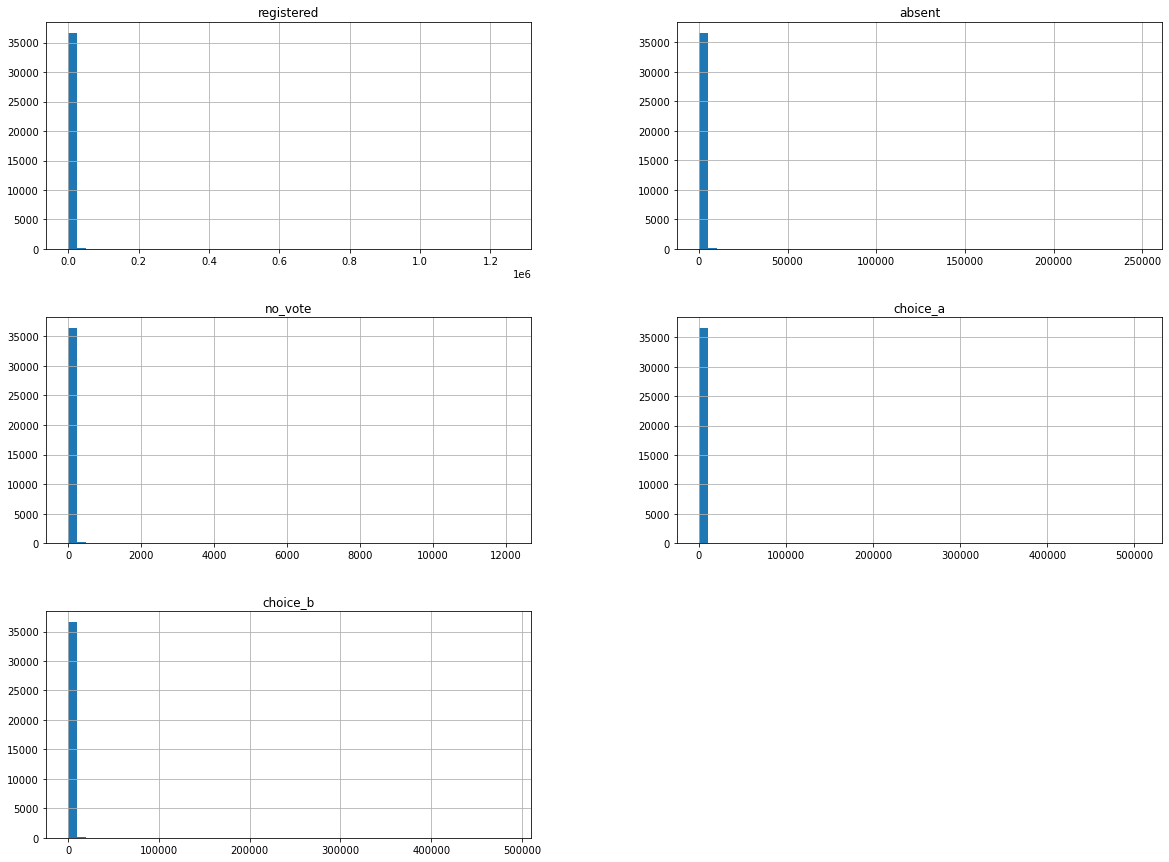

In [19]:
data_without_code = data.drop("com_code", axis=1)
data_without_code.hist(bins=50, figsize=(20,15));

### Modifying and Adding Columns

In order to get get a better sense of how the votes in each commune are distributed, we convert the values in columns `choice_a`, `choice_b`, `no_vote` and `absent` as percentages with respect to the total registered voters in the commune. 

In [40]:
# create a modified dataset starting from the copy of the original
data_mod = data.copy()

# convert votes to percentage of total registered voters in commune
for col in ["choice_a","choice_b","no_vote","absent"]:
    data_mod[col] = 100.0*(data_mod[col] / data_mod["registered"])

Now we add a column that represents the total registered voters in each commune as a percentage of the total number of voters in the dataset. 

In [41]:
# add column denoting % of the registered voters in commune compared to total 
data_mod["registered_pc"] = 100.0*(data_mod["registered"] / data_mod["registered"].sum())

We create a column which denotes the outcome of the referendum in each commune. The rules used for deciding the outcome are : 
* If choice A get more votes than choice B, blanks and absentees combined, choice A wins (`outcome == "A"`). 
* If choice B get more votes than choice A, blanks and absentees combined, choice B wins (`outcome == "B"`).
* If neither of the above rules apply, the outcome is null and void (`outcome == "N"`).

In [42]:
# add column denoting outcome of the referendum in given commune
data_mod["outcome"] = "N" 

# creating boolean masks for choosing if A or B won the referendum
mask_A = (data_mod["choice_a"] > (data_mod["choice_b"] + data_mod["no_vote"] + data_mod["absent"]))
mask_B = (data_mod["choice_b"] > (data_mod["choice_a"] + data_mod["no_vote"] + data_mod["absent"]))

# Replacing N with winners A or B
data_mod.loc[mask_A , "outcome"] = "A"
data_mod.loc[mask_B , "outcome"] = "B"

We can quickly check the outcome of the referendum for all the communes combined.

In [39]:
data_mod["outcome"].value_counts()

B    19288
N    16123
A     1380
Name: outcome, dtype: int64

> Thus, choice B seems to be the clear winner, winning in 19288 communes versus 1380 communes for choice A. 

In [107]:
data_mod.head().transpose()

,0,1,2,3,4
dep_code,1,1,1,1,1
dep_label,AIN,AIN,AIN,AIN,AIN
com_code,1,2,4,5,6
com_label,L'Abergement-Clémenciat,L'Abergement-de-Varey,Ambérieu-en-Bugey,Ambérieux-en-Dombes,Ambléon
registered,592,215,8205,1152,105
absent,14.189189,16.744186,20.694698,14.756944,16.190476
no_vote,1.52027,2.325581,1.535649,1.5625,0.952381
choice_a,26.013514,30.697674,33.113955,24.305556,33.333333
choice_b,58.277027,50.232558,44.655698,59.375,49.52381
registered_pc,0.001286,0.000467,0.017826,0.002503,0.000228


We also take a look at the distribution of percentage of votes for choice A and choice B, across all communes. 

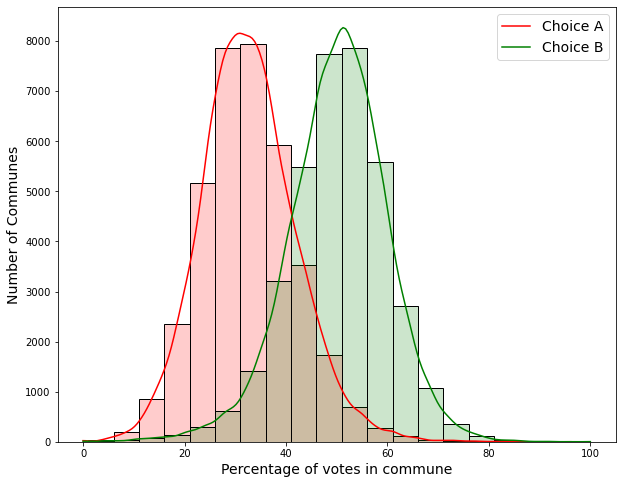

In [143]:
fig, ax = plt.subplots(figsize=(10,8));
sns.histplot(data_mod, x="choice_a", bins=range(1, 100, 5), kde=True, legend=True, color="red", alpha=0.2, ax=ax);
sns.histplot(data_mod, x="choice_b", bins=range(1, 100, 5), kde=True, legend=True, color="green", alpha=0.2, ax=ax);
ax.legend(["Choice A", "Choice B"], fontsize = 14);
ax.set_xlabel("Percentage of votes in commune", fontsize=14);
ax.set_ylabel("Number of Communes", fontsize=14);

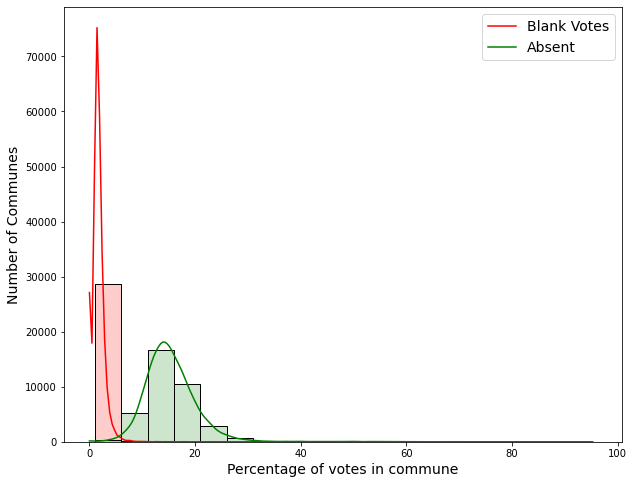

In [105]:
fig, ax = plt.subplots(figsize=(10,8));
sns.histplot(data_mod, x="no_vote", bins=range(1, 100, 5), kde=True, legend=True, color="red", alpha=0.2, ax=ax);
sns.histplot(data_mod, x="absent", bins=range(1, 100, 5), kde=True, legend=True, color="green", alpha=0.2, ax=ax);
ax.legend(["Blank Votes", "Absent"], fontsize=14);
ax.set_xlabel("Percentage of votes in commune", fontsize=14);
ax.set_ylabel("Number of Communes", fontsize=14);

### Departments

In [130]:
col_list = ["registered","choice_a", "choice_b", "no_vote", "absent"]
departments = data.pivot_table(values=col_list, index="dep_label" , aggfunc=np.sum)
departments.head()

,absent,choice_a,choice_b,no_vote,registered
dep_label,,,,,
AIN,65996,116379,204980,6453,393808
AISNE,72928,120916,177028,5196,376068
ALLIER,45266,96398,109552,5059,256275
ALPES DE HAUTE PROVENCE,21034,44634,56154,2111,123933
ALPES MARITIMES,153383,179663,403179,9063,745288


In [131]:
departments.describe()

,absent,choice_a,choice_b,no_vote,registered
count,107.000000,107.000000,107.000000,107.000000,1.070000e+02
mean,88263.018692,146725.046729,188632.046729,6553.177570,4.301733e+05
std,85055.664973,113560.726380,141296.627664,4280.043078,3.217624e+05
min,2193.000000,1456.000000,1175.000000,39.000000,4.923000e+03
25%,36542.000000,63893.000000,84246.500000,3427.500000,1.874765e+05
50%,64453.000000,117554.000000,151728.000000,5434.000000,3.530560e+05
75%,107271.000000,185595.500000,261541.000000,9467.000000,5.544165e+05
max,635882.000000,605167.000000,765932.000000,24737.000000,1.792359e+06


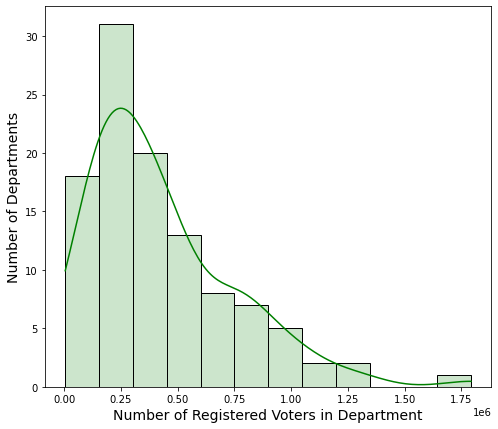

In [132]:
fig, ax = plt.subplots(figsize=(8,7));
sns.histplot(departments, x="registered", kde=True, legend=True, color="green", alpha=0.2, ax=ax);
ax.set_xlabel("Number of Registered Voters in Department", fontsize=14);
ax.set_ylabel("Number of Departments", fontsize=14);

In [134]:
departments["outcome"] = "N" 

# creating boolean masks for choosing if A or B won the referendum in the department
mask_A = (departments["choice_a"] > (departments["choice_b"] + departments["no_vote"] + departments["absent"]))
mask_B = (departments["choice_b"] > (departments["choice_a"] + departments["no_vote"] + departments["absent"]))

# Replacing N with winners A or B
departments.loc[mask_A , "outcome"] = "A"
departments.loc[mask_B , "outcome"] = "B"

departments.head()

,absent,choice_a,choice_b,no_vote,registered,outcome
dep_label,,,,,,
AIN,65996,116379,204980,6453,393808,B
AISNE,72928,120916,177028,5196,376068,N
ALLIER,45266,96398,109552,5059,256275,N
ALPES DE HAUTE PROVENCE,21034,44634,56154,2111,123933,N
ALPES MARITIMES,153383,179663,403179,9063,745288,B


In [136]:
departments["outcome"].value_counts()

N    94
B    13
Name: outcome, dtype: int64

In [139]:
for col in ["choice_a","choice_b","no_vote","absent"]:
    departments[col] = 100.0*(departments[col] / departments["registered"])

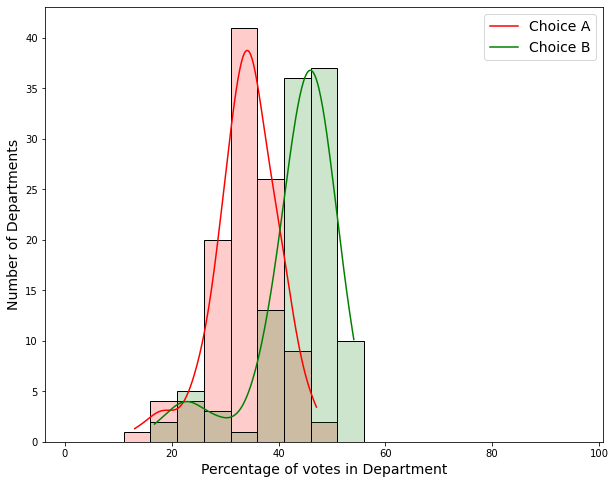

In [144]:
fig, ax = plt.subplots(figsize=(10,8));
sns.histplot(departments, x="choice_a", bins=range(1, 100, 5), kde=True, legend=True, color="red", alpha=0.2, ax=ax);
sns.histplot(departments, x="choice_b", bins=range(1, 100, 5), kde=True, legend=True, color="green", alpha=0.2, ax=ax);
ax.legend(["Choice A", "Choice B"], fontsize = 14);
ax.set_xlabel("Percentage of votes in Department", fontsize=14);
ax.set_ylabel("Number of Departments", fontsize=14);

In [154]:
departments["pop_cat"] = pd.cut(departments["registered"], bins=[0., 1e5, 5e5, 1e6, np.inf],labels=[1, 2, 3, 4])
departments["pop_cat"].value_counts()

2    66
3    26
1     8
4     7
Name: pop_cat, dtype: int64

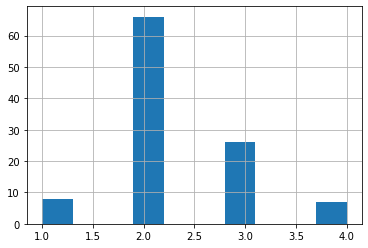

In [155]:
departments["pop_cat"].hist();

In [179]:
col_list = ["choice_a", "choice_b"]
dep_means = departments.pivot_table(values=col_list, index="pop_cat" , aggfunc=np.mean)
dep_means

,choice_a,choice_b
pop_cat,,
1,29.419917,32.877871
2,34.445008,44.563778
3,34.017862,44.681837
4,32.973782,40.366996


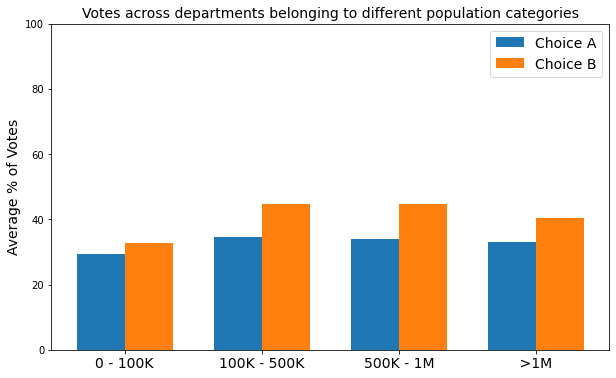

In [205]:
labels = ["0 - 100K", '100K - 500K', "500K - 1M", " >1M "]

x = np.arange(len(labels)) 
width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots(figsize=(10,6))

b1 = ax.bar(x - width/2.0, dep_means["choice_a"], width, label='Choice A')
b2 = ax.bar(x + width/2.0, dep_means["choice_b"], width, label='Choice B')

ax.set_title("Votes across departments belonging to different population categories", fontsize =14)
ax.set_ylabel('Average % of Votes', fontsize=14);
ax.set_ylim(0,100);
ax.set_xticks(x);
ax.set_xticklabels(labels, fontsize=14);
#ax.set_xticklabels(labels = labels, fontsize=14);
ax.legend(fontsize=14);

In [217]:

#departments.loc["AIN", "registered"]
data_new = data.copy()

data_new["dep_cat"] = 0

for dep in departments.index:
    mask = (data["dep_label"] == dep )
    data_new.loc[mask, "dep_cat"] = departments.loc[dep, "pop_cat"]

data_new.head()

,dep_code,dep_label,com_code,com_label,registered,absent,no_vote,choice_a,choice_b,dep_cat
0,1,AIN,1,L'Abergement-Clémenciat,592,84,9,154,345,2
1,1,AIN,2,L'Abergement-de-Varey,215,36,5,66,108,2
2,1,AIN,4,Ambérieu-en-Bugey,8205,1698,126,2717,3664,2
3,1,AIN,5,Ambérieux-en-Dombes,1152,170,18,280,684,2
4,1,AIN,6,Ambléon,105,17,1,35,52,2


### Splitting into train and test sets